In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
dataset = pd.read_csv("matches.csv")

In [2]:
dataset.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
dataset.shape

(756, 18)

In [4]:
dataset.info

<bound method DataFrame.info of         id  season  ...         umpire2                  umpire3
0        1    2017  ...        NJ Llong                      NaN
1        2    2017  ...          S Ravi                      NaN
2        3    2017  ...       CK Nandan                      NaN
3        4    2017  ...   C Shamshuddin                      NaN
4        5    2017  ...             NaN                      NaN
..     ...     ...  ...             ...                      ...
751  11347    2019  ...        O Nandan                   S Ravi
752  11412    2019  ...     Nitin Menon                Ian Gould
753  11413    2019  ...             NaN                      NaN
754  11414    2019  ...  Bruce Oxenford  Chettithody Shamshuddin
755  11415    2019  ...       Ian Gould              Nigel Llong

[756 rows x 18 columns]>

In [5]:
dataset.describe

<bound method NDFrame.describe of         id  season  ...         umpire2                  umpire3
0        1    2017  ...        NJ Llong                      NaN
1        2    2017  ...          S Ravi                      NaN
2        3    2017  ...       CK Nandan                      NaN
3        4    2017  ...   C Shamshuddin                      NaN
4        5    2017  ...             NaN                      NaN
..     ...     ...  ...             ...                      ...
751  11347    2019  ...        O Nandan                   S Ravi
752  11412    2019  ...     Nitin Menon                Ian Gould
753  11413    2019  ...             NaN                      NaN
754  11414    2019  ...  Bruce Oxenford  Chettithody Shamshuddin
755  11415    2019  ...       Ian Gould              Nigel Llong

[756 rows x 18 columns]>

In [6]:
dataset.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
dataset.umpire3.first_valid_index()

636

In [8]:
dataset.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
dataset = dataset.drop(columns=['umpire3'], axis=1)
#As umpire3 has lot of null values it is not required

In [10]:
sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [11]:
teams_win = dataset.groupby('season')['winner'].value_counts()
teams_win


season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [12]:
y = 2008
team_season_wins = pd.DataFrame(columns=['year', 'team', 'wins'])
for i in teams_win.iteritems():    
    if i[0][0]==y:
        print(i)
        win_series = pd.DataFrame({
            'year': [i[0][0]],
            'team': [i[0][1]],
            'wins': [i[1]]
        })
        team_season_wins = team_season_wins.append(win_series)
        y += 1

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [13]:
team_season_wins

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


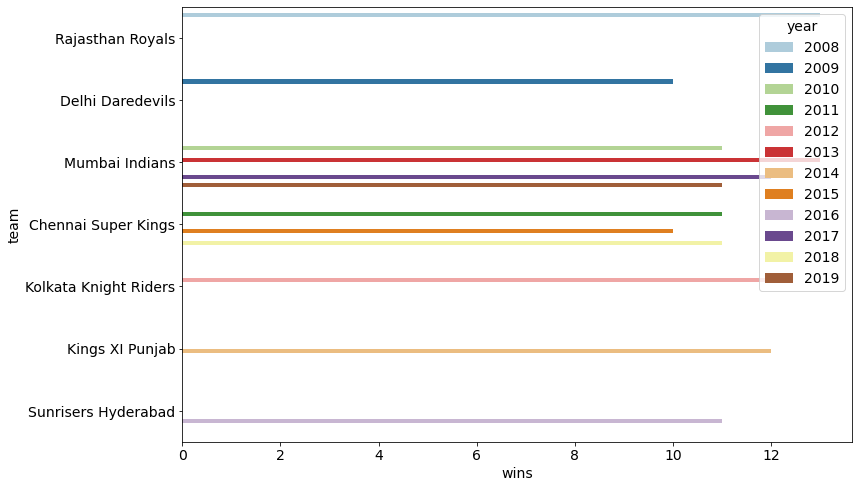

In [14]:
sns.barplot('wins', 'team', hue='year', data=team_season_wins, palette='Paired');


In [15]:
highest_venue = dataset['venue'].value_counts()
highest_venue = highest_venue.to_frame().reset_index()
highest_venue= highest_venue.rename(columns= {'venue': 'matches'})
highest_venue

,index,matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


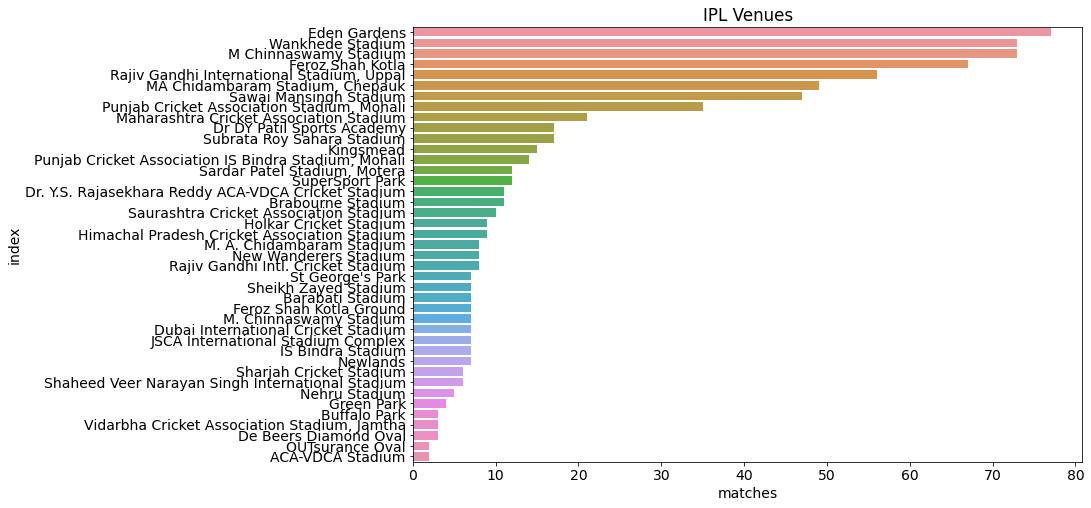

In [16]:
plt.title("IPL Venues")
sns.barplot(x='matches', y='index', data=highest_venue);

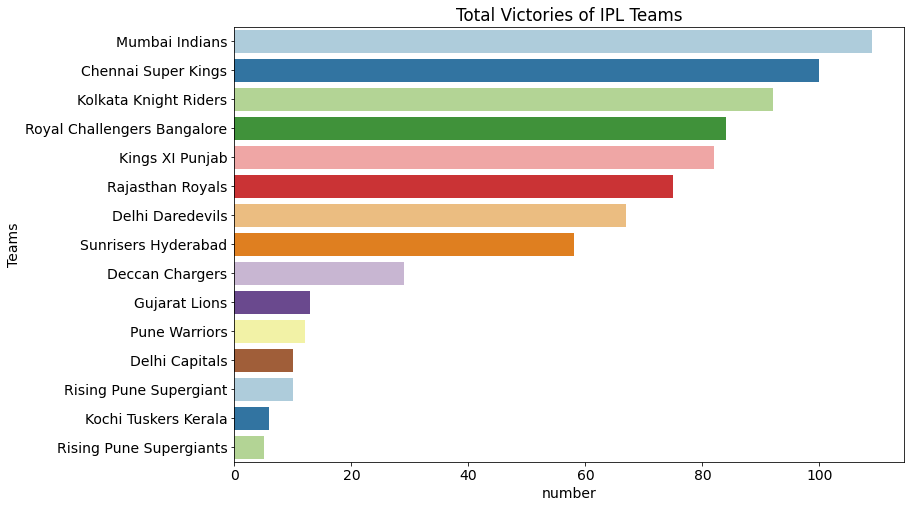

In [17]:
team_wins_ser = dataset['winner'].value_counts()
team_wins_ser = team_wins_ser.to_frame().reset_index()
team_wins_ser= team_wins_ser.rename(columns= {'index': 'Teams'})
team_wins_ser= team_wins_ser.rename(columns= {'index': 'Teams'})
team_wins_ser= team_wins_ser.rename(columns= {'winner': 'number'})
plt.title("Total Victories of IPL Teams")
sns.barplot(x='number', y='Teams', data=team_wins_ser, palette='Paired');


In [18]:
mvp_ser = dataset['player_of_match'].value_counts()
mvp_ser = mvp_ser.to_frame().reset_index()
mvp_ser= mvp_ser.rename(columns= {'index': 'Players'})
mvp_ser= mvp_ser.rename(columns= {'player_of_match': 'no_of_times'})
mvp_ser =mvp_ser.iloc[:11]
mvp_ser


,Players,no_of_times
0,CH Gayle,21
1,AB de Villiers,20
2,DA Warner,17
3,MS Dhoni,17
4,RG Sharma,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,V Kohli,12


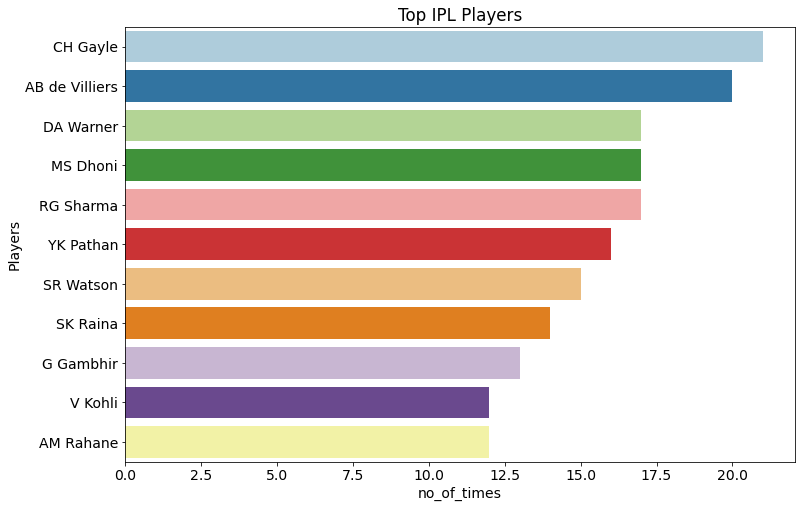

In [19]:
plt.title("Top IPL Players")
sns.barplot(x='no_of_times', y='Players', data=mvp_ser, palette='Paired');

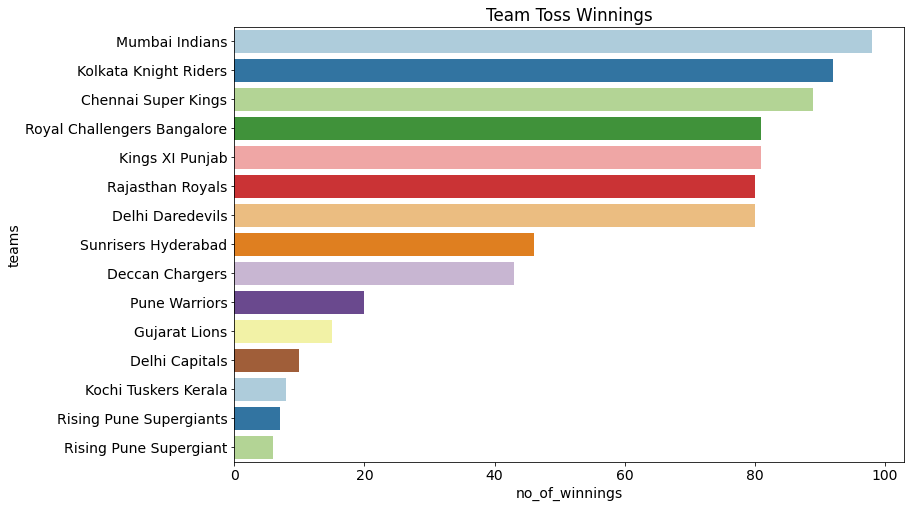

In [28]:
toss_ser = dataset['toss_winner'].value_counts()
toss_ser = toss_ser.to_frame().reset_index()
toss_ser= toss_ser.rename(columns= {'index': 'teams'})
toss_ser= toss_ser.rename(columns= {'toss_winner': 'no_of_winnings'})
plt.title("Team Toss Winnings")
sns.barplot(x='no_of_winnings', y='teams', data=toss_ser, palette='Paired');

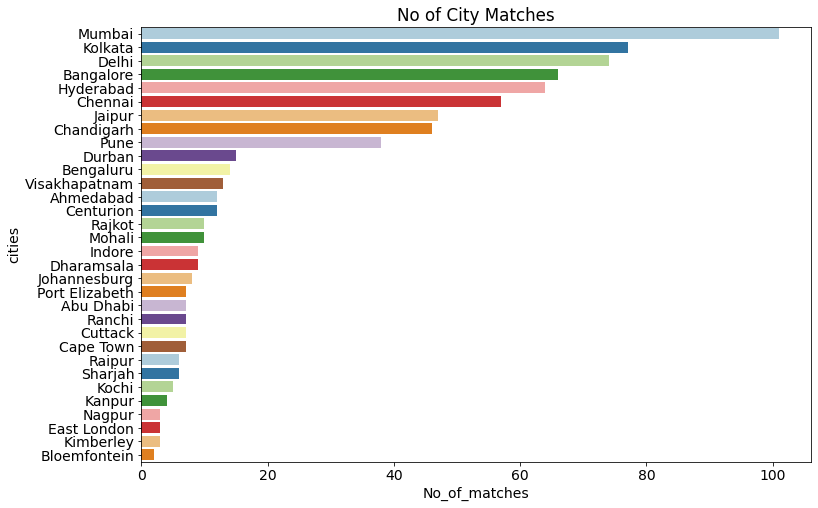

In [34]:
city_matches = dataset['city'].value_counts()
city_matches= city_matches.to_frame().reset_index()
city_matches = city_matches.rename(columns={"index" : "cities"})
city_matches = city_matches.rename(columns={"city" : "No_of_matches"})
plt.title("No of City Matches")
sns.barplot(x='No_of_matches', y='cities', data=city_matches, palette='Paired');


In [35]:
winbyruns = dataset['win_by_runs'].value_counts()
winbyruns.sort_values(ascending=True)

146      1
98       1
77       1
93       1
102      1
      ... 
1       10
10      11
4       11
14      13
0      419
Name: win_by_runs, Length: 89, dtype: int64

In [36]:
s = 146#highest win by runs
for i,r in dataset.iterrows():
  if(r['win_by_runs'] == s ):
    print(r)



id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object


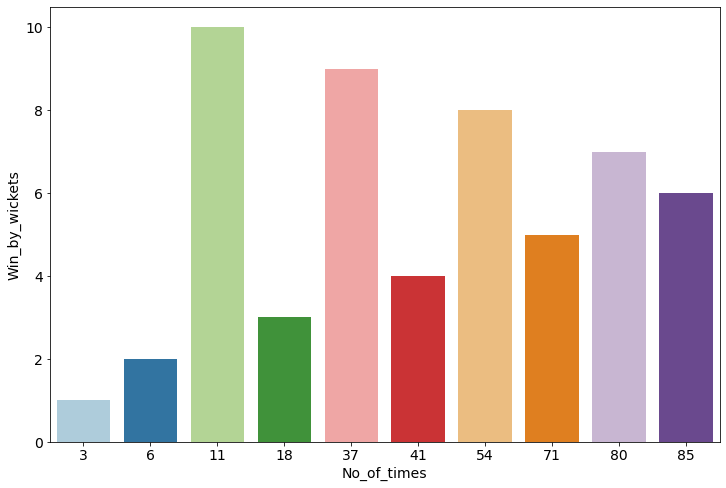

In [44]:
win_by_wickets = dataset['win_by_wickets'].value_counts()
win_by_wickets = win_by_wickets.to_frame().reset_index().drop([0])
win_by_wickets = win_by_wickets.rename(columns={"index":"Win_by_wickets"})
win_by_wickets = win_by_wickets.rename(columns={"win_by_wickets":"No_of_times"})
sns.barplot(x='No_of_times', y='Win_by_wickets', data=win_by_wickets, palette='Paired');

In [40]:
for i, r in dataset.iterrows():
  if(r['win_by_wickets'] == 10):
    print(r)

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
Name: 2, dtype

##Conclusion
<ul>
<li>Mumbai Indians has won most number of times in IPL</li>
<li>Mumbai Indians has won the most number of toss</li>

<li>The Mumbai city has hosted the most number of IPL matches</li>

<li>Chris Gayle has won the maximum number of player of the match title</li>
<li>Eden Gardens has hosted the maximum number of IPL matches.
</li>
<li> 40 venues have hosted 756 IPL matches</li>
<li>In Top 10,  5 indian players are postioned</li>

</ul>